In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

In [2]:
# Loading the data (signs)
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

In [4]:
X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


y668 = 5


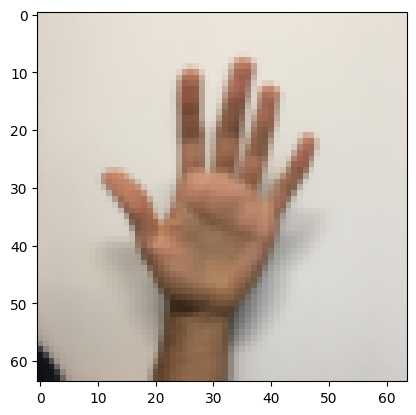

In [20]:
# Example of an image from the dataset
index = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train_orig[index])
print (f"y{index} = " + str(np.squeeze(Y_train_orig[:, index])))

In [23]:
# GRADED FUNCTION: convolutional_model

def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """
    input_img = tf.keras.Input(shape=input_shape)
    conv = tfl.Conv2D(filters=8, kernel_size=(4,4), padding='same')(input_img)
    relu = tfl.ReLU()(conv)
    maxpool = tfl.MaxPool2D(pool_size=(8,8), padding='same', strides=(8,8))(relu)
    conv2 = tfl.Conv2D(16, (2,2), padding='same')(maxpool)
    relu2 = tfl.ReLU()(conv2)
    maxpool2 = tfl.MaxPool2D(pool_size=(4,4), padding='same', strides=(4,4))(relu2)
    flatten = tfl.Flatten()(maxpool2)
    output = tfl.Dense(6, activation='softmax')(flatten)
    
    model = tf.keras.Model(inputs=input_img, outputs=output, name='SignLangDigitRecognizer')
    return model
    

In [24]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
    
output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]
    
comparator(summary(conv_model), output)


Model: "SignLangDigitRecognizer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_2 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 8, 8, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_3 (ReLU)              (None, 8, 8, 16)          0         
                                          

In [29]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=300, validation_data=test_dataset)

Epoch 1/300
17/17 [==============================] - 0s 12ms/step - loss: 0.4159 - accuracy: 0.8583 - val_loss: 0.5166 - val_accuracy: 0.8167
Epoch 2/300
17/17 [==============================] - 0s 10ms/step - loss: 0.4121 - accuracy: 0.8630 - val_loss: 0.5137 - val_accuracy: 0.8167
Epoch 3/300
17/17 [==============================] - 0s 10ms/step - loss: 0.4083 - accuracy: 0.8630 - val_loss: 0.5106 - val_accuracy: 0.8167
Epoch 4/300
17/17 [==============================] - 0s 10ms/step - loss: 0.4051 - accuracy: 0.8630 - val_loss: 0.5104 - val_accuracy: 0.8167
Epoch 5/300
17/17 [==============================] - 0s 10ms/step - loss: 0.4013 - accuracy: 0.8667 - val_loss: 0.5081 - val_accuracy: 0.8167
Epoch 6/300
17/17 [==============================] - 0s 11ms/step - loss: 0.3974 - accuracy: 0.8694 - val_loss: 0.5063 - val_accuracy: 0.8083
Epoch 7/300
17/17 [==============================] - 0s 12ms/step - loss: 0.3941 - accuracy: 0.8704 - val_loss: 0.5030 - val_accuracy: 0.8083
Epoch 

In [30]:
history.history

{'loss': [0.41590943932533264,
  0.4120619595050812,
  0.408262699842453,
  0.40508556365966797,
  0.40134620666503906,
  0.39742669463157654,
  0.3941309154033661,
  0.3914288282394409,
  0.3881622850894928,
  0.3848215341567993,
  0.38201019167900085,
  0.37873727083206177,
  0.375621497631073,
  0.3727491497993469,
  0.36971503496170044,
  0.36672550439834595,
  0.3645228147506714,
  0.36113542318344116,
  0.3580690026283264,
  0.3557167053222656,
  0.35259386897087097,
  0.3502119779586792,
  0.34773141145706177,
  0.34537431597709656,
  0.3426975905895233,
  0.3402079641819,
  0.3378707766532898,
  0.335582435131073,
  0.3329923748970032,
  0.3304290175437927,
  0.32813987135887146,
  0.32588276267051697,
  0.3234458267688751,
  0.3214647173881531,
  0.31920772790908813,
  0.3170376420021057,
  0.31508663296699524,
  0.31291282176971436,
  0.31057804822921753,
  0.30808162689208984,
  0.306145042181015,
  0.30396515130996704,
  0.3020738959312439,
  0.2999870777130127,
  0.2979136

C:\Users\acer\AppData\Local\Temp\ipykernel_4388\973814028.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\acer\AppData\Local\Temp\ipykernel_4388\973814028.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

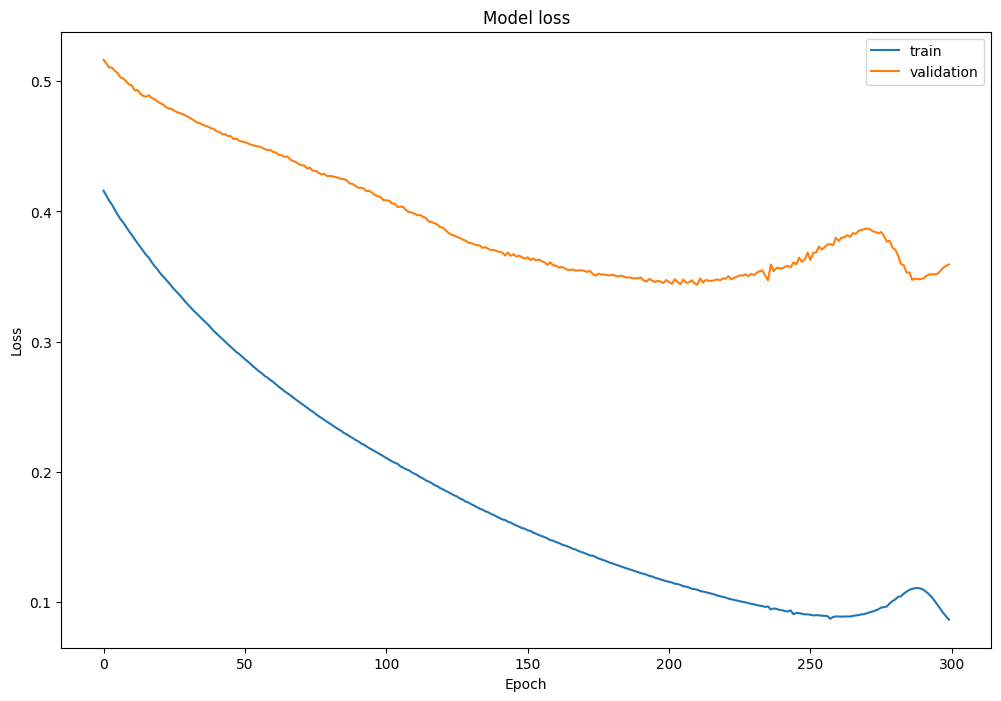

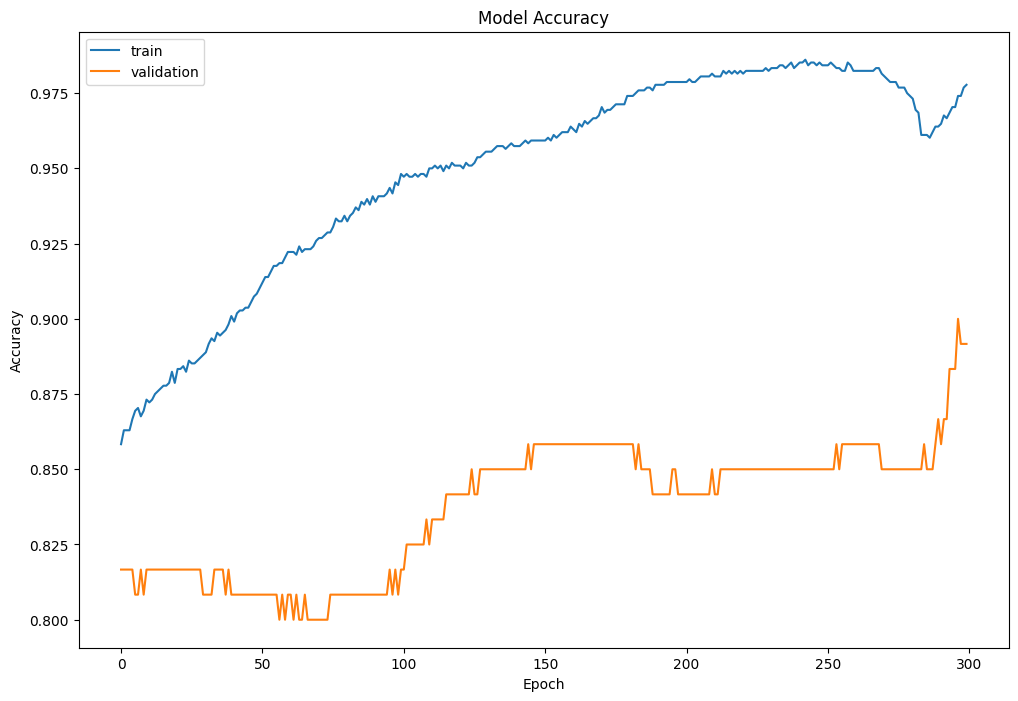

In [31]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')